In [3]:
!pip install torch
!pip install gym
!pip install hydra-core
!pip install vmas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.0/218.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.8 MB/s eta 0:00:00
  Created wheel for vmas: filename=vmas-1.5.2-py3-none-any.whl size=260251 sha256=53684c4051cf14c4f081960a20f45de266a8168ae6c9cdf88bcc2c6ece89412f
  Stored in directory: /root/.cache/pip/wheels/a7/6f/80/31791456a87da225991ef3a80730ff89d3b96fe30ffba64d3a
Successfully built vmas
  Attempting uninstall: gym-notices
    Found existing installation: gym-notices 0.1.0
    Uninstalling gym-notices-0.1.0:
      Successfully uninstalled gym-notices-0.1.0


In [4]:
pip install --upgrade hydra-core omegaconf


In [5]:
import torch

print("torch:", torch.__version__)
print("cuda available:", torch.cuda.is_available())
print("vmas import: ok")
print("torchrl import: ok")


torch: 2.9.0+cpu
cuda available: False
vmas import: ok
torchrl import: ok


In [17]:
import torch
import vmas

device = "cuda" if torch.cuda.is_available() else "cpu"

env = vmas.make_env(
    scenario="football",
    num_envs=4,
    device=device,
    continuous_actions=True,
)

obs = env.reset()
print("reset ok")
print("n_agents:", env.n_agents)
print("num_envs:", env.num_envs)


reset ok
n_agents: 3
num_envs: 4


In [18]:
import torch

n_agents = env.n_agents

# Each agent action should be [num_envs, action_size]
actions = []
for i in range(n_agents):
    action_size = env.action_space[i].shape[0]
    actions.append(torch.zeros((env.num_envs, action_size), device=env.device))

obs, rewards, dones, infos = env.step(actions)
print("step ok")
print("type(rewards):", type(rewards))
print("type(obs):", type(obs))
print("dones shape:", dones.shape)


step ok
type(rewards): <class 'list'>
type(obs): <class 'list'>
dones shape: torch.Size([4])


In [14]:
import hydra
from omegaconf import DictConfig

@hydra.main(config_path="conf", config_name="config", version_base=None)
def my_app(cfg: DictConfig):
    print(f"Using {cfg.algorithm.mappo.n_iters} iterations for MAPPO")

if __name__ == "__main__":
    my_app()


usage: colab_kernel_launcher.py [--help] [--hydra-help] [--version]
                                [--cfg {job,hydra,all}] [--resolve]
                                [--package PACKAGE] [--run] [--multirun]
                                [--shell-completion]
                                [--config-path CONFIG_PATH]
                                [--config-name CONFIG_NAME]
                                [--config-dir CONFIG_DIR]
                                [--experimental-rerun EXPERIMENTAL_RERUN]
                                [--info [{all,config,defaults,defaults-tree,plugins,searchpath}]]
                                [overrides ...]
colab_kernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

Mounted at /content/drive


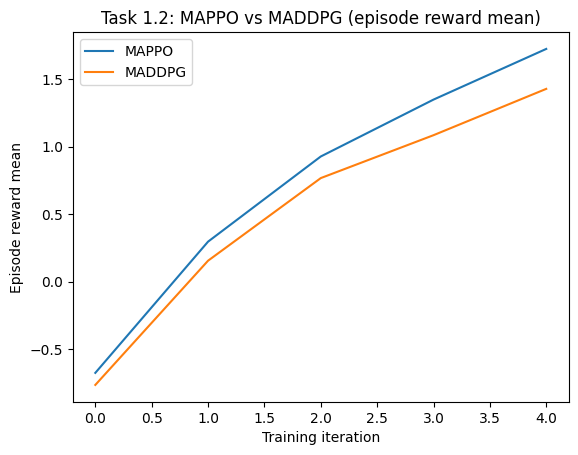

MAPPO mean of last 20: 0.7237
MADDPG mean of last 20: 0.5339


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 如果你用的是 Drive 保存：
from google.colab import drive
drive.mount('/content/drive')

base = "/content/drive/MyDrive/CI_soccer_metrics"
mappo = torch.load(f"{base}/episode_reward_mean_list_MAPPO.pt")
maddpg = torch.load(f"{base}/episode_reward_mean_list_MADDPG.pt")

plt.figure()
plt.plot(mappo, label="MAPPO")
plt.plot(maddpg, label="MADDPG")
plt.xlabel("Training iteration")
plt.ylabel("Episode reward mean")
plt.title("Task 1.2: MAPPO vs MADDPG (episode reward mean)")
plt.legend()
plt.show()

# 数字总结（写进 README 用）
k = 20
mappo_lastk = float(np.mean(mappo[-k:])) if len(mappo) >= k else float(np.mean(mappo))
maddpg_lastk = float(np.mean(maddpg[-k:])) if len(maddpg) >= k else float(np.mean(maddpg))

print(f"MAPPO mean of last {k}: {mappo_lastk:.4f}")
print(f"MADDPG mean of last {k}: {maddpg_lastk:.4f}")
